In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import os
import scipy
import numpy as np
import seaborn as sns
from functools import reduce

from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline



    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


/bin/sh: line 1: sox: command not found
/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


## Paper-figures

In [ ]:
threshold=0.5
save_tikz = True
lag = 200

multicorrect=True
correction_method='fdr_bh' #'fdr_bh' #

y_lims = [0.18, 0.85]
sig_offset_y=0.80
arch_ind_offset=0.85

### layerwise plots

#### timit

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels returned: (286,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Peak corr (median): 0.6161236418209896, occurs at x_coordinate: 3
INFO:Peak corr (max): 0.9484646849354336, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.405719032065362, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.956725002924982, occurs at x_coordinate: 0
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.5455325994129347, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8866673710022782, occurs at x_coordinate: 0
INFO:Applying multiple correction to p-values, using fdr_bh method.
INFO:Trained-untrained: # of significant levels 13..
INFO:Trained-ST

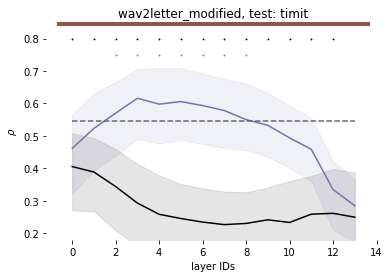

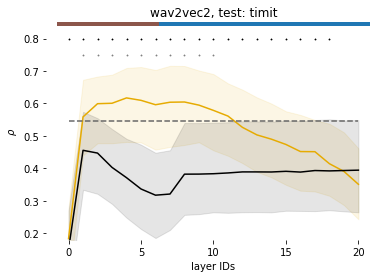

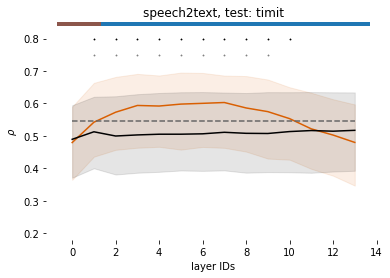

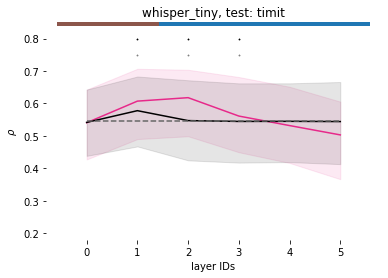

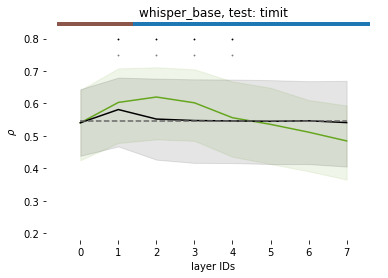

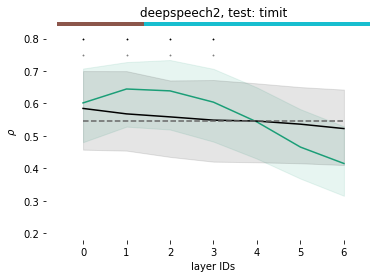

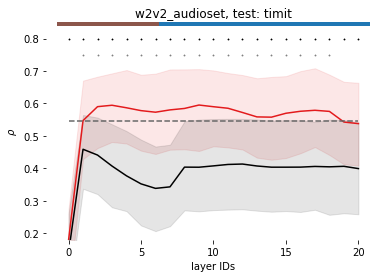

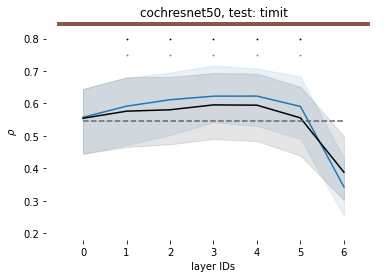

In [6]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	'w2v2_audioset',
	'cochresnet50',
]
bin_width = 50

trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_normalized=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
        sig_offset_y=sig_offset_y,
        arch_ind_offset=arch_ind_offset,
        y_lims=y_lims,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
        multicorrect=multicorrect,
        correction_method=correction_method,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

#### mVocs

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels returned: (360,)
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Peak corr (median): 0.7065401614269363, occurs at x_coordinate: 4
INFO:Peak corr (max): 0.9867347732251618, occurs at x_coordinate: 9
INFO:Peak corr (median): 0.49044783830339045, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8768205630068534, occurs at x_coordinate: 12
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.640810206336317, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.9349453263354016, occurs at x_coordinate: 0
INFO:Applying multiple correction to p-values, using fdr_bh method.
INFO:Trained-untrained: # of signif

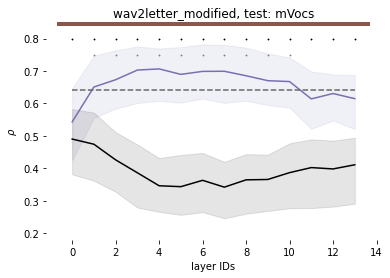

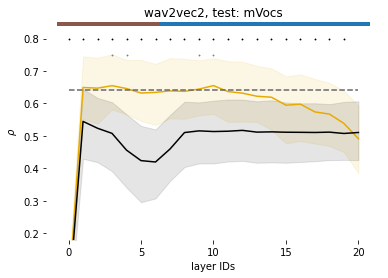

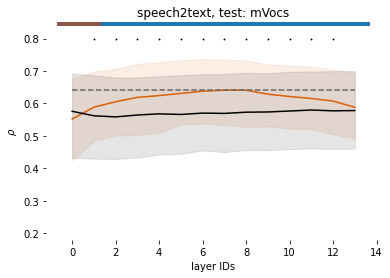

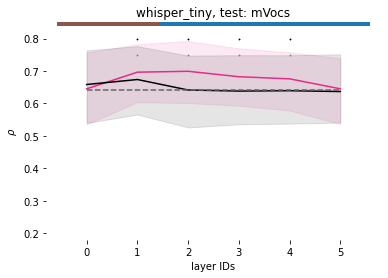

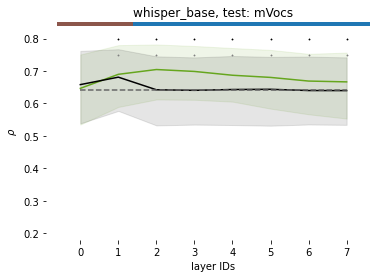

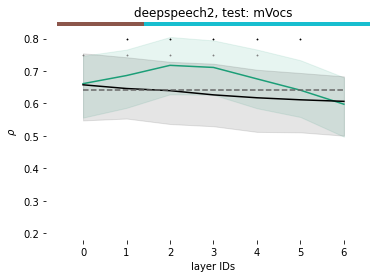

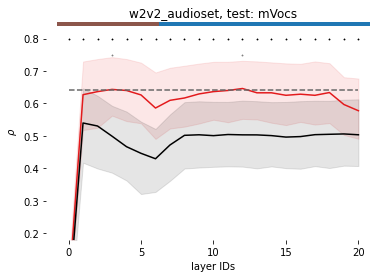

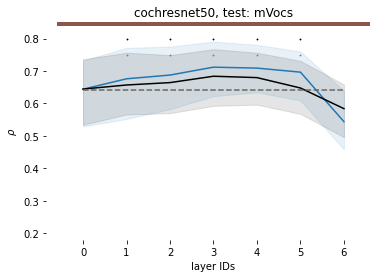

In [7]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	'w2v2_audioset',
	'cochresnet50',
]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_normalized=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
        sig_offset_y=sig_offset_y,
        arch_ind_offset=arch_ind_offset,
        y_lims=y_lims,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
        multicorrect=multicorrect,
        correction_method=correction_method,
)

### summary of peak correlations

#### timit

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 3
INFO:Number of sig. neurons = 286
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 0
INFO:Number of sig. neurons = 286
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 4
INFO:Number of sig. neurons = 286
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 1
INFO:Number of sig. neurons = 286
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 7
INFO:Number of sig. neurons = 286
INFO:Extra

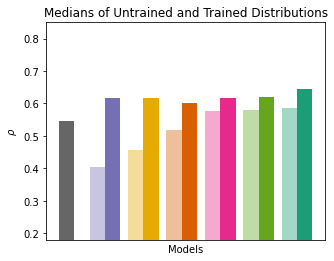

In [3]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = trained_identifier.replace('ucsf', 'ucsf_reset')
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
mVocs=False
tikz_indicator = f'trf{lag}'
bin_width = 50
tikzplots.plot_correlations_summary(
	model_names,
	trained_identifier,
    untrained_identifiers,
    baseline_identifier,
    threshold=threshold,
	bin_width=bin_width,
	mVocs=mVocs,
    tikz_indicator=tikz_indicator,
    y_lims=y_lims,
	width = 0.4,
	alpha=0.4,
	save_tikz=save_tikz
	)


#### mVocs

INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 4
INFO:Number of sig. neurons = 360
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 0
INFO:Number of sig. neurons = 360
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 10
INFO:Number of sig. neurons = 360
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 1
INFO:Number of sig. neurons = 360
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:At bin_width: 50, layer with p

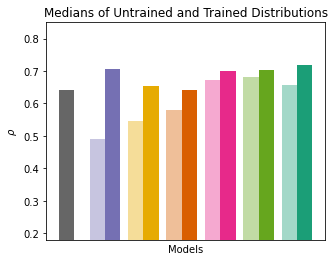

In [9]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = trained_identifier.replace('ucsf', 'ucsf_reset')
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
mVocs=True
tikz_indicator = f'trf{lag}'
bin_width = 50
tikzplots.plot_correlations_summary(
	model_names,
	trained_identifier,
    untrained_identifiers,
    baseline_identifier,
    threshold=threshold,
	bin_width=bin_width,
    tikz_indicator=tikz_indicator,
	mVocs=mVocs,
    y_lims=y_lims,
	width = 0.4,
	alpha=0.4,
	save_tikz=save_tikz
	)


### STRF normalized distriutions...

In [7]:
plot_normalized=True
multicorrect=False
correction_method='fdr_bh' #'fdr_bh' #

y_lims = [0.4, 1.3]
sig_offset_y=0.80
arch_ind_offset=1.3

#### timit

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: test_cc_raw
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: test_cc_raw
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 1.0934680626369266, occurs at x_coordinate: 3
INFO:Peak corr (max): 37985291.64161958, occurs at x_coordinate: 9
INFO:Peak corr (median): 0.7324776217568232, occurs at x_coordinate: 0
INFO:Peak corr (max): 30088360.01638853, occurs at x_coordinate: 0
result saved at: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-0.5-Reg-trained-timit-normalized-trf200-all-bw50ms-wav2letter_modified.tex
INFO:Plotting trained and shuffled distributions for wav2vec2
INFO:Extracting column: test_cc_raw
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number o

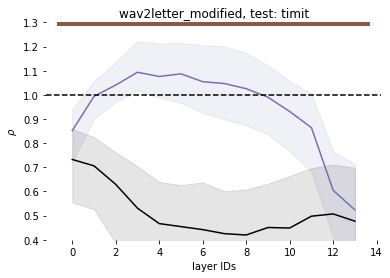

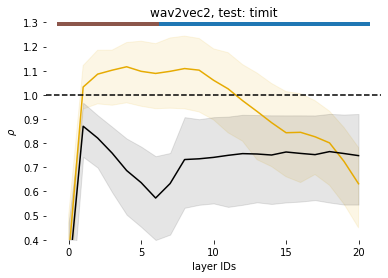

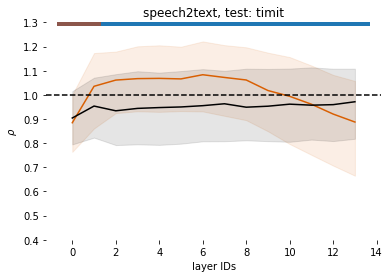

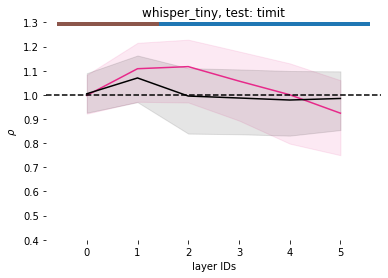

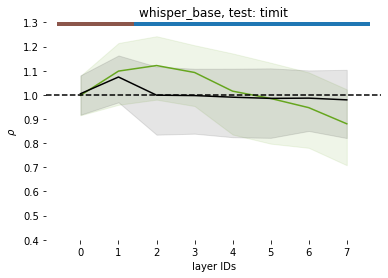

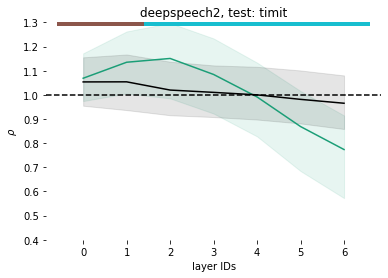

In [5]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
]
bin_width = 50

trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=False,
		plot_normalized=plot_normalized,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
        sig_offset_y=sig_offset_y,
        arch_ind_offset=arch_ind_offset,
        y_lims=y_lims,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
        multicorrect=multicorrect,
        correction_method=correction_method,
)

#### mVocs

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: mVocs_test_cc_raw
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (489,)
INFO:Extracting column: mVocs_test_cc_raw
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 1.0793299007578574, occurs at x_coordinate: 6
INFO:Peak corr (max): 38029621.58948143, occurs at x_coordinate: 4
INFO:Peak corr (median): 0.7620009399660533, occurs at x_coordinate: 0
INFO:Peak corr (max): 13879237.072785333, occurs at x_coordinate: 4
result saved at: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-0.5-Reg-trained-mVocs-normalized-trf200-all-bw50ms-wav2letter_modified.tex
INFO:Plotting trained and shuffled distributions for wav2vec2
INFO:Extracting column: mVocs_test_cc_raw
INFO:Filtering 'mVocs_normalizer' using multi

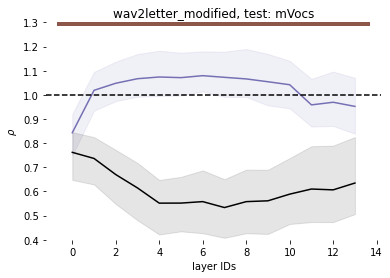

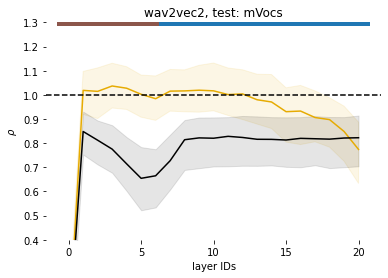

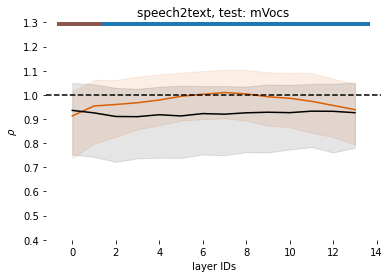

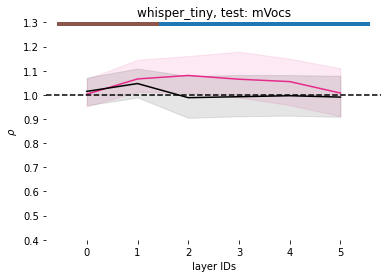

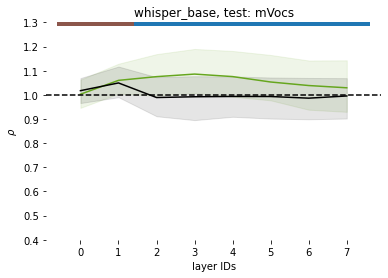

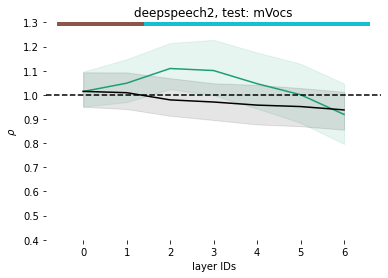

In [6]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=False,
		plot_normalized=plot_normalized,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
        sig_offset_y=sig_offset_y,
        arch_ind_offset=arch_ind_offset,
        y_lims=y_lims,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
        multicorrect=multicorrect,
        correction_method=correction_method,
)

#### summary (normalized plots)

INFO:Extracting column: test_cc_raw
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 5
INFO:Number of sig. neurons = 404
INFO:Extracting column: test_cc_raw
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 0
INFO:Number of sig. neurons = 404
INFO:Extracting column: test_cc_raw
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 7
INFO:Number of sig. neurons = 404
INFO:Extracting column: test_cc_raw
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 1
INFO:Number of sig. neurons = 404
INFO:Extracting column: test_cc_raw
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 6
INFO:Number of sig. neurons = 404
INFO:Extracting column: test_cc_raw
INFO:Filt

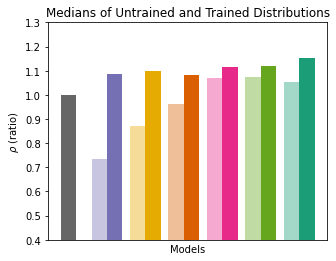

In [8]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = trained_identifier.replace('ucsf', 'ucsf_reset')
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
mVocs=False
tikz_indicator = f'trf{lag}'
bin_width = 50
tikzplots.plot_correlations_summary(
	model_names,
	trained_identifier,
    untrained_identifiers,
    baseline_identifier,
    threshold=threshold,
	bin_width=bin_width,
	mVocs=mVocs,
    tikz_indicator=tikz_indicator,
    plot_normalized=plot_normalized,
    y_lims=y_lims,
	width = 0.4,
	alpha=0.4,
	save_tikz=save_tikz
	)


INFO:Extracting column: mVocs_test_cc_raw
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 7
INFO:Number of sig. neurons = 489
INFO:Extracting column: mVocs_test_cc_raw
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 0
INFO:Number of sig. neurons = 489
INFO:Extracting column: mVocs_test_cc_raw
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 10
INFO:Number of sig. neurons = 489
INFO:Extracting column: mVocs_test_cc_raw
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 1
INFO:Number of sig. neurons = 489
INFO:Extracting column: mVocs_test_cc_raw
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:At bin_width: 50, layer with peak median is: 8
INFO:Number of sig

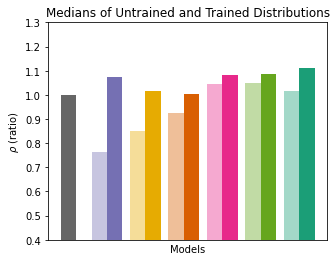

In [9]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = trained_identifier.replace('ucsf', 'ucsf_reset')
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
mVocs=True
tikz_indicator = f'trf{lag}'
bin_width = 50
tikzplots.plot_correlations_summary(
	model_names,
	trained_identifier,
    untrained_identifiers,
    baseline_identifier,
    threshold=threshold,
	bin_width=bin_width,
	mVocs=mVocs,
    tikz_indicator=tikz_indicator,
    plot_normalized=plot_normalized,
    y_lims=y_lims,
	width = 0.4,
	alpha=0.4,
	save_tikz=save_tikz
	)


### testing RF on deepspeech2 and whisper_tiny

#### mVocs

In [ ]:

from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
    'whisper_tiny',
    'deepspeech2',
    ]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
# untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
untrained_identifiers = ['ucsf_reset_mVocs_trf_lags200_bw50_regression_improved_rf_ablations']
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)

In [ ]:
model_name = 'whisper_tiny'
trained_identifier = 'ucsf_reset_mVocs_trf_lags200_bw50_regression_improved'
threshold = 0.5
area = 'all'
bin_width = 50
delay = 0
normalized=True
column = None
mVocs = True

corr_obj_trained = Correlations(model_name+'_'+trained_identifier)
data_dist_trained = corr_obj_trained.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width, delay=delay,
        threshold=threshold, normalized=normalized,
        column=column, mVocs=mVocs, 
        
    )
medians = [np.median(data_dist_trained[layer]) for layer in data_dist_trained]
medians

In [ ]:
model_name = 'whisper_tiny'
trained_identifier = 'ucsf_reset_mVocs_trf_lags200_bw50_regression_improved_rf_ablations'
threshold = 0.5
area = 'all'
bin_width = 50
delay = 0
normalized=True
column = None
mVocs = True

corr_obj_trained = Correlations(model_name+'_'+trained_identifier)
data_dist_trained = corr_obj_trained.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width, delay=delay,
        threshold=threshold, normalized=normalized,
        column=column, mVocs=mVocs, 
        
    )
medians = [np.median(data_dist_trained[layer]) for layer in data_dist_trained]
medians

### testing additional models

#### timit

INFO:auditory_cortex.plotters.correlation_plotter:Plotting trained and shuffled distributions for cochresnet50
INFO:auditory_cortex.analyses.correlations_analyzer:Extracting column: normalized_test_cc
INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Number of channels returned: (404,)
INFO:auditory_cortex.analyses.correlations_analyzer:Extracting column: normalized_test_cc
INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.6058978834625197, occurs at x_coordinate: 3
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (max): 0.9432376147323828, occurs at x_coordinate: 1
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.5736493959562952, occurs at x_coordinate: 3
INFO:auditory_cortex.plotters.correlation_plot

model_name 'cochresnet50' not recognizable!!!


INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.5350408969767726, occurs at x_coordinate: 0
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (max): 0.8919744485408868, occurs at x_coordinate: 0
INFO:auditory_cortex.plotters.correlation_plotter:Trained-untrained: # of significant levels 5..
INFO:auditory_cortex.plotters.correlation_plotter:Trained-STRF: # of significant levels 5..


model_name 'baseline' not recognizable!!!


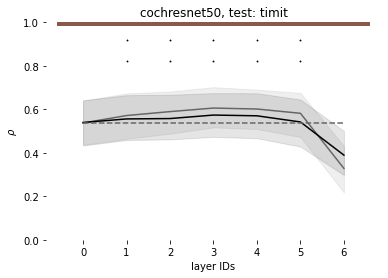

In [4]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
    # 'cochcnn9',
    'cochresnet50',
    ]
bin_width = 50
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
# untrained_identifiers = [trained_identifier]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)

#### mVocs

INFO:auditory_cortex.plotters.correlation_plotter:Plotting trained and shuffled distributions for cochcnn9
INFO:auditory_cortex.analyses.correlations_analyzer:Extracting column: mVocs_normalized_test_cc
INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Number of channels returned: (489,)
INFO:auditory_cortex.analyses.correlations_analyzer:Extracting column: mVocs_normalized_test_cc
INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.6927016835066585, occurs at x_coordinate: 3
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (max): 1.1030857338722868, occurs at x_coordinate: 3
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.6614635566976748, occurs at x_coordinate: 3
INFO:auditory_cortex.plott

model_name 'cochcnn9' not recognizable!!!


INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.633264301960968, occurs at x_coordinate: 0
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (max): 1.143353675999906, occurs at x_coordinate: 0
INFO:auditory_cortex.plotters.correlation_plotter:Trained-untrained: # of significant levels 4..
INFO:auditory_cortex.plotters.correlation_plotter:Trained-STRF: # of significant levels 3..
INFO:auditory_cortex.plotters.correlation_plotter:Plotting trained and shuffled distributions for cochresnet50


model_name 'baseline' not recognizable!!!


INFO:auditory_cortex.analyses.correlations_analyzer:Extracting column: mVocs_normalized_test_cc
INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Number of channels returned: (489,)
INFO:auditory_cortex.analyses.correlations_analyzer:Extracting column: mVocs_normalized_test_cc
INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.6972764431085174, occurs at x_coordinate: 4
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (max): 1.092457478895415, occurs at x_coordinate: 2
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.6733944744951651, occurs at x_coordinate: 3
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (max): 1.0974985187327542, occurs at x_coordinate: 2


model_name 'cochresnet50' not recognizable!!!


INFO:auditory_cortex.analyses.correlations_analyzer:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (median): 0.633264301960968, occurs at x_coordinate: 0
INFO:auditory_cortex.plotters.correlation_plotter:Peak corr (max): 1.143353675999906, occurs at x_coordinate: 0
INFO:auditory_cortex.plotters.correlation_plotter:Trained-untrained: # of significant levels 5..
INFO:auditory_cortex.plotters.correlation_plotter:Trained-STRF: # of significant levels 5..


model_name 'baseline' not recognizable!!!


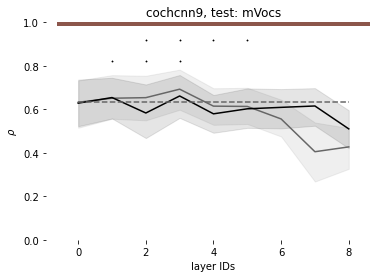

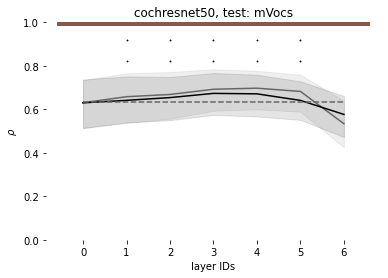

In [5]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
    'cochcnn9',
    'cochresnet50',
    ]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
# untrained_identifiers = [trained_identifier]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)

INFO:Plotting trained and shuffled distributions for w2v2_audioset
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (489,)
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
model_name 'w2v2_audioset' not recognizable!!!
INFO:Peak corr (median): 0.6357898172604802, occurs at x_coordinate: 12
INFO:Peak corr (max): 1.064921963613701, occurs at x_coordinate: 1
INFO:Peak corr (median): 0.5305192043069047, occurs at x_coordinate: 1
INFO:Peak corr (max): 0.9458469349485116, occurs at x_coordinate: 1
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.633264301960968, occurs at x_coordinate: 0
INFO:Peak corr (max): 1.143353675999906, occurs at x_coordinate: 0


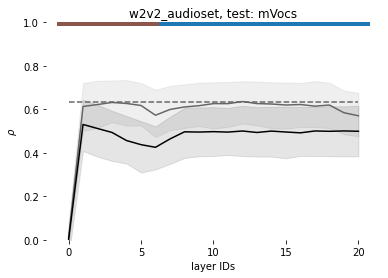

In [ ]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
    'w2v2_audioset',
    ]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
# untrained_identifiers = [trained_identifier]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=False,
		# plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)

INFO:Plotting trained and shuffled distributions for w2v2_audioset
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'w2v2_audioset' not recognizable!!!
INFO:Peak corr (median): 0.5792335639505477, occurs at x_coordinate: 3
INFO:Peak corr (max): 0.9275612847595434, occurs at x_coordinate: 1
INFO:Peak corr (median): 0.44815013530424974, occurs at x_coordinate: 1
INFO:Peak corr (max): 0.931079417679042, occurs at x_coordinate: 1
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.5350408969767726, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8919744485408868, occurs at x_coordinate: 0
INFO:Trained-untrained: # of significant levels 21..
INFO:Trained-STRF: # of significant leve

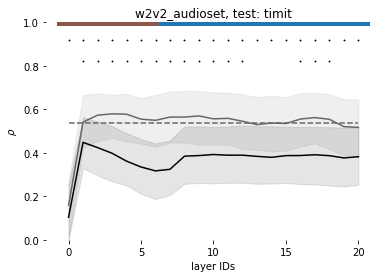

In [5]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
    'w2v2_audioset',
    ]
bin_width = 50
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
# untrained_identifiers = [trained_identifier]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)

INFO:Plotting trained and shuffled distributions for whisper_tiny
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (489,)
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.6843269075763602, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.1511884430438055, occurs at x_coordinate: 0
INFO:Peak corr (median): 0.6843269075763602, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.1511884430438055, occurs at x_coordinate: 0
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.6293123125504121, occurs at x_coordinate: 0
INFO:Peak corr (max): 1.143353675999906, occurs at x_coordinate: 0
INFO:Plotting trained and shuffled distributions for whisper_base
INFO:Extracting column: mVocs_normalized_test_

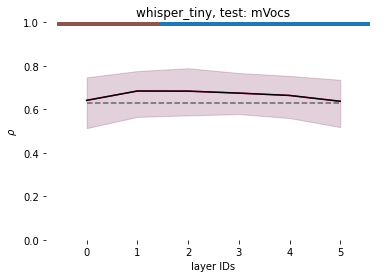

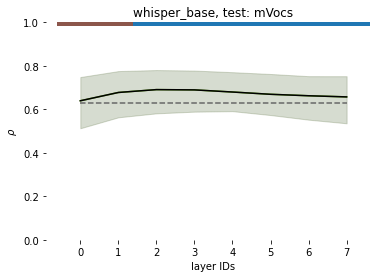

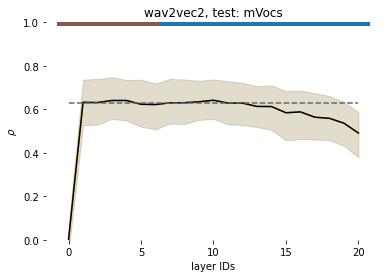

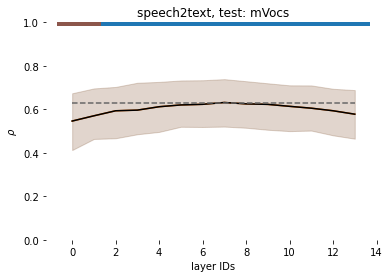

In [3]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
    'whisper_tiny',
    'whisper_base',
    # 'wav2letter_modified',
    'wav2vec2',
    'speech2text',
    # 'deepspeech2',

    # 'w2v2_audioset'
    ]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_ahmed25'
# untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
untrained_identifiers = [trained_identifier]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_ahmed25"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=False,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)